# Crop Production In China EDA

#### Table of Contents

1. Introduction

    1.1 Data source and dataset

2. Data Loading and Description

3. Exploring The Dataset

    3.1. Initial observations
(Summary of the data types in the dataset)

    3.2. Final observations
    
4. Data Normalization

    4.1. Missing Data 

QUESTIONS

5. Conclusion

6. BONUS (Fun Facts About Bahrain)


### 1. Introduction

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered and explored in the analysis.

This dataset contains data from the Food and Agriculture Organization of the United Nations (FAO)

The objective of this dataset is to comprehensively cover production of all primary crops for all countries in Asia.
 

### 1.1 Data source and Dataset

a. How was it collected?

Data Source: 
International reliable sources, estimated data, calculated data, manual estimation, expert sources from FAO and data reported on country official publications or web sites.

Website: https://data.world/agriculture/crop-production

Year: 2016

Description: " Crop statistics for 173 products in Africa, the Americas, Asia, Europe, and Oceania "


### Data Dictionary

| Column Name | Type | Description |
| ----------- | ---- | ----------- |
| area_code   | integer | Country Code         |
| area        | string | Country Name|
| country     | url    |  Country Name |
|item_code    |integer | Item Code |
| item        | string | Item Description |
| element_code| integer| Measured Element Code|
|element | string |Element Description |
| unit | string | Unit of Measurement|
| year | integer | Corresponds To The Year of The Data |
| quantity | integer | Quantity of Crops Produced In Unit Tonne|



### 2. Data Loading and Description

The dataset comprises of 568642 rows and 9 columns. 

- Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

- Reading .csv file

In [2]:
asia = pd.read_csv('/Users/ahmedaldossary/Documents/Crop_Project//data/production_crops_e_asia.csv')

### 3. Exploring The Dataset

### 3.1. Initial Observations:

Summary of data types in this dataset:

Numeric: Year (Float)

Object: Area, Item, Year, Element, Unit

There are   missing that have null values that may need to be addressed.



In [3]:
asia.head()

,area_code,area,item_code,item,element_code,element,unit,y1961,y1961f,y1962,...,y2015,y2015f,y2016,y2016f,y2017,y2017f,y2018,y2018f,y2019,y2019f
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,14676.0,NaN,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16521.0,Fc,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,24246.0,NaN,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,25000.0,F,25787.0,Im,28398.0,Im,26725.0,Im,27562.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7200.0,Fc,6982.0,Fc,6863.0,Fc,6898.0,Fc,6903.0,Fc


- Creating List of Columns to Melt

In [4]:
# for loop to make years list
count = 1960
years_list = []
flag_list = []
for i in range(1,60):
    count += 1
    years_list.append(f"y{count}")
count = 1960
for i in range(1,60):
    count += 1
    flag_list.append(f"y{count}f")

- Melting Columns Into Rows

In [5]:
asia_wide = asia.melt(id_vars = ["area_code","area","item_code","item","element_code","element", "unit"],value_vars= years_list, var_name="year", value_name="quantity")

 - Removing String From Year Column and Converting To Integer

In [6]:
asia_wide["year"] = asia_wide.year.str.removeprefix("y")

In [7]:
asia_wide["year"] = asia_wide.year.astype("int")

- Investegating for Null Values

In [8]:
asia_wide

,area_code,area,item_code,item,element_code,element,unit,year,quantity
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,1961,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,1961,NaN
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,1961,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,1961,NaN
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,1961,NaN
...,...,...,...,...,...,...,...,...,...
568637,249,Yemen,1729,"Treenuts, Total",5419,Yield,hg/ha,2019,17516.0
568638,249,Yemen,1729,"Treenuts, Total",5510,Production,tonnes,2019,11340.0
568639,249,Yemen,1735,Vegetables Primary,5312,Area harvested,ha,2019,41528.0
568640,249,Yemen,1735,Vegetables Primary,5419,Yield,hg/ha,2019,115155.0


- Plotting Heatmap of Null Values In Dataset

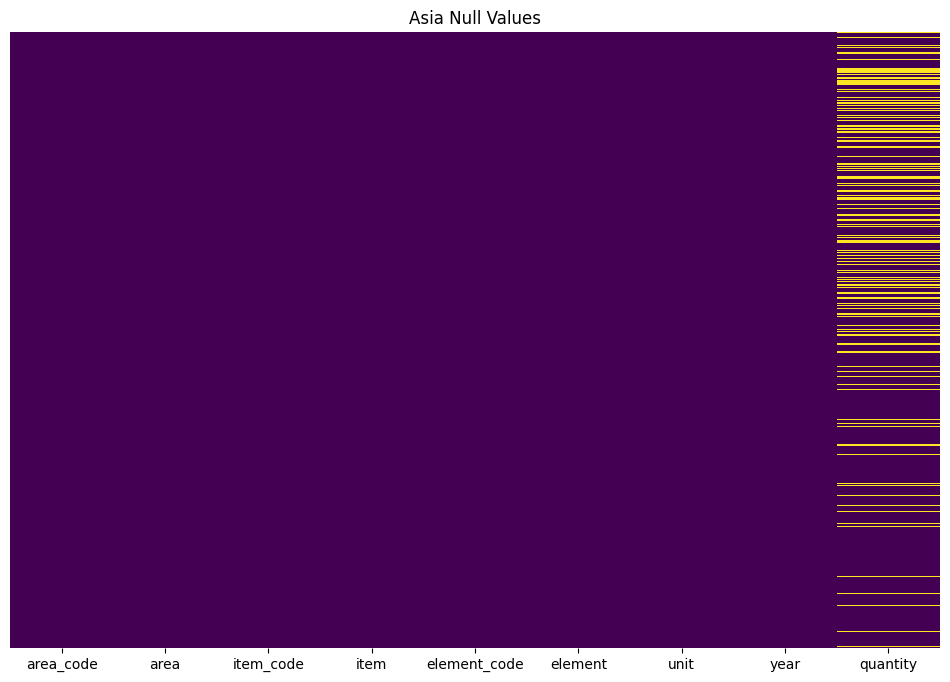

In [9]:
plt.figure(figsize = (12,8))
sns.heatmap(data = asia_wide.isnull(),yticklabels= False, cbar=False,cmap="viridis")
plt.title("Asia Null Values");

### 3.2. Final observations
Variables to transform prior to analysis:
- Reshape the dataframe to make the analysis easier
- Represent the null values in a heat map
- Due to some areas not producing crops or climate change it created null values in the dataset and was handled by replacing it with 0.
- Assign element to production only
- Delete unnecessary columns which are area_code, item_code and element_code
- Remove the prefix from the year and convert the data type to integer

### 4. Data Normalization

4.1. Missing Data 

- Filling in the nulls

In [10]:
asia_wide.quantity.fillna(0,inplace=True)

In [11]:
asia_wide.isnull().sum()

area_code       0
area            0
item_code       0
item            0
element_code    0
element         0
unit            0
year            0
quantity        0
dtype: int64

- Assigning Production Element To A Variable

In [12]:
asia_production = asia_wide[asia_wide["element"] == "Production"]

In [13]:
asia_production.drop(axis=1, labels=["area_code","item_code","element_code"],inplace=True)

/var/folders/yn/r1t3820x6kj1hrnkz_9b21s80000gn/T/ipykernel_32180/2307432003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_production.drop(axis=1, labels=["area_code","item_code","element_code"],inplace=True)


In [14]:
asia_production.sort_values(by = ["area","quantity"],ascending=False)

,area,item,element,unit,year,quantity
481875,Yemen,Fruit Primary,Production,tonnes,2010,1253538.0
501151,Yemen,Fruit Primary,Production,tonnes,2012,1210468.0
510789,Yemen,Fruit Primary,Production,tonnes,2013,1207117.0
144536,Yemen,"Cereals, Total",Production,tonnes,1975,1199953.0
472237,Yemen,Fruit Primary,Production,tonnes,2009,1185248.0
...,...,...,...,...,...,...
520569,Afghanistan,Fibre Crops Primary,Production,tonnes,2015,0.0
530207,Afghanistan,Fibre Crops Primary,Production,tonnes,2016,0.0
539845,Afghanistan,Fibre Crops Primary,Production,tonnes,2017,0.0
549483,Afghanistan,Fibre Crops Primary,Production,tonnes,2018,0.0


- Selecting The Most Recent 10 Years Of The Data

In [15]:
asia_last_10_yrs = asia_production[asia_production["year"] > 2008]

- Created a dataframe which only includes China

In [16]:
china = asia_last_10_yrs[asia_last_10_yrs["area"] == "China, mainland"]
china

,area,item,element,unit,year,quantity
463970,"China, mainland","Almonds, with shell",Production,tonnes,2009,35000.0
463973,"China, mainland","Anise, badian, fennel, coriander",Production,tonnes,2009,42000.0
463976,"China, mainland",Apples,Production,tonnes,2009,31680788.0
463979,"China, mainland",Apricots,Production,tonnes,2009,43000.0
463982,"China, mainland",Artichokes,Production,tonnes,2009,63000.0
...,...,...,...,...,...,...
560733,"China, mainland","Pulses, Total",Production,tonnes,2019,4835388.0
560736,"China, mainland","Roots and Tubers, Total",Production,tonnes,2019,150550882.0
560739,"China, mainland",Sugar Crops Primary,Production,tonnes,2019,121661000.0
560742,"China, mainland","Treenuts, Total",Production,tonnes,2019,4722254.0


# QUESTIONS

### 1- Crop Production By Country By Tonnes

In [17]:
crop_per_country = pd.DataFrame(asia_production.groupby(by = ["area"]).quantity.sum().sort_values(ascending=False).head(10)).astype("int")
pd.DataFrame(crop_per_country.quantity.apply(lambda x : "{:,}".format(x)))

,quantity
area,
"China, mainland","116,682,285,941"
India,"74,845,173,652"
Indonesia,"22,436,692,046"
Thailand,"12,917,958,688"
Pakistan,"9,635,390,066"
Turkey,"9,217,781,499"
Philippines,"8,479,596,985"
Viet Nam,"7,061,898,120"
Bangladesh,"6,768,501,853"


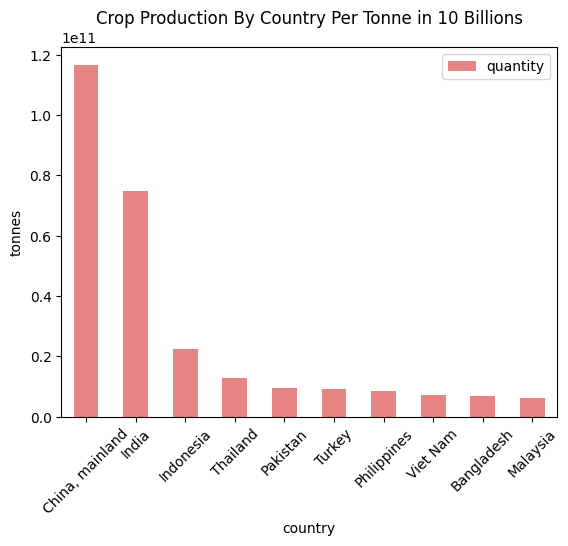

In [18]:
crop_per_country.plot(kind="bar", color= '#e68484')
plt.xticks(rotation = 45)
plt.title("Crop Production By Country Per Tonne in 10 Billions")
plt.ylabel("tonnes")
plt.xlabel("country");

Observation: The top producer within asia is China. It has produced around 116 Billion tonnes within the period of 1961 till 2019.

### 2- Top 10 Products in Asia

In [19]:
top_10_asia = pd.DataFrame(asia_last_10_yrs.groupby(by = ["item"]).quantity.sum().sort_values(ascending=False).head(10)).astype("int")

In [20]:
top_10_asia_df = pd.DataFrame(top_10_asia.quantity.apply(lambda x : "{:,}".format(x))).reset_index()
top_10_asia_df

,item,quantity
0,"Cereals, Total","14,708,687,635"
1,Vegetables Primary,"8,563,272,281"
2,Sugar Crops Primary,"8,311,464,426"
3,Sugar cane,"7,893,250,413"
4,"Rice, paddy","7,234,246,087"
5,Oilcrops,"5,348,224,788"
6,Fruit Primary,"5,068,638,420"
7,"Rice, paddy (rice milled equivalent)","4,825,242,138"
8,"Roots and Tubers, Total","3,620,637,939"
9,Wheat,"3,487,423,298"


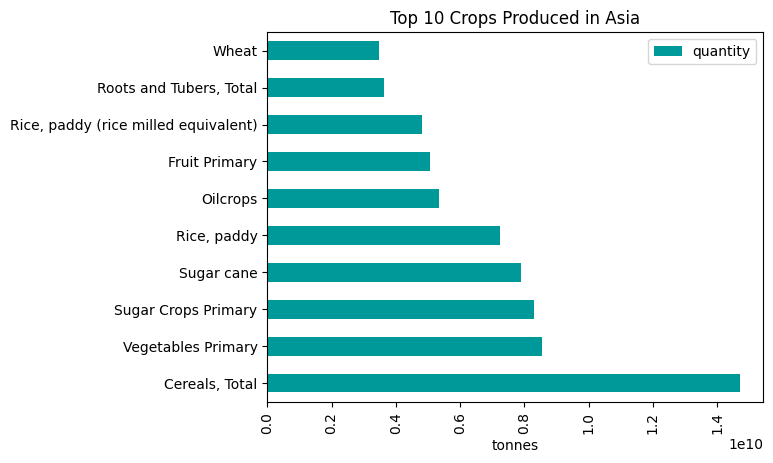

In [21]:
top_10_asia.plot(kind="barh",color= "#009999")
plt.xticks(rotation = 90)
plt.xlabel("tonnes")
plt.ylabel("")
plt.title("Top 10 Crops Produced in Asia");

Observation: Cereal has the highest amount of tonnes produced in Asia

### 3- Total Crops Produced From 1961 to 2019

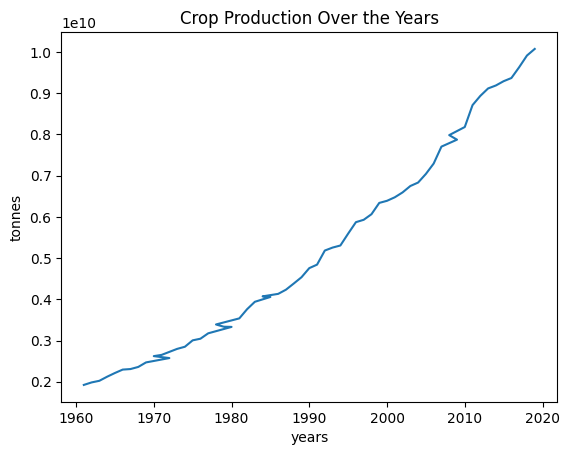

In [22]:
asia_production_plot = pd.DataFrame(asia_production.groupby(by = ["year"]).quantity.sum().sort_values(ascending=False)).astype("int")
asia_production_plot.plot()
plt.title("Crop Production Over the Years")
plt.xlabel("years")
plt.ylabel("tonnes")
plt.legend().remove();

Observation: Crop production has positively increased over the period of time in Asia.

### 4- Growth of Cereal Over 10 Years

In [23]:
cereal_asia = asia_production[asia_production["item"] == "Cereals, Total"]
cereal_asia

,area,item,element,unit,year,quantity
111,Afghanistan,"Cereals, Total",Production,tonnes,1961,3695000.0
279,Armenia,"Cereals, Total",Production,tonnes,1961,0.0
505,Azerbaijan,"Cereals, Total",Production,tonnes,1961,0.0
818,Bangladesh,"Cereals, Total",Production,tonnes,1961,14523696.0
995,Bhutan,"Cereals, Total",Production,tonnes,1961,98408.0
...,...,...,...,...,...,...
567862,Turkmenistan,"Cereals, Total",Production,tonnes,2019,1689357.0
567989,United Arab Emirates,"Cereals, Total",Production,tonnes,2019,6708.0
568235,Uzbekistan,"Cereals, Total",Production,tonnes,2019,6992495.0
568400,Viet Nam,"Cereals, Total",Production,tonnes,2019,48208141.0


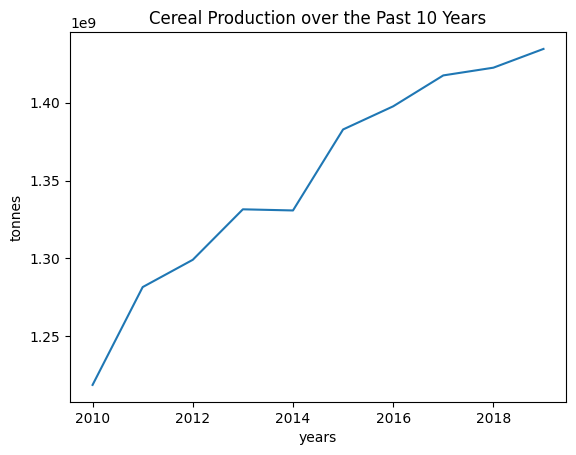

In [24]:
cereal_plot = pd.DataFrame(cereal_asia.groupby(by = ["year"]).quantity.sum().sort_index(ascending=False).head(10)).astype("int")
cereal_plot.plot()
plt.title("Cereal Production over the Past 10 Years")
plt.xlabel("years")
plt.ylabel("tonnes")
plt.legend().remove();

Observation: Cereal Production has positively increased within the past 10 years in Asia.

### 5- Most Productive Country

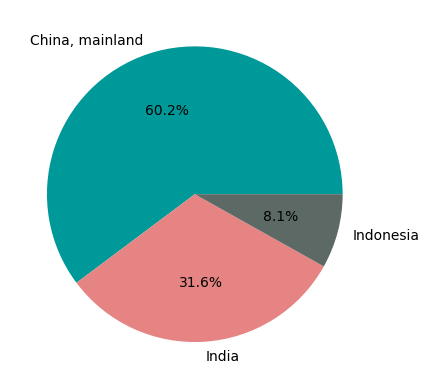

In [25]:
cereal_asia_df = pd.DataFrame(cereal_asia.groupby("area").quantity.sum().sort_values(ascending = False)).reset_index()
pd.DataFrame(cereal_asia_df.quantity.apply(lambda x : "{:,}".format(x))).head(3)
fig, ax = plt.subplots()
ax.pie(cereal_asia_df["quantity"][0:3], 
       labels=cereal_asia_df["area"][0:3],
       autopct='%1.1f%%',
       colors=['#009999', '#e68484', '#5c6965']);

Most Productive Country in the past 10 years in terms of Cereal Production


Observation: China has surpassed India & Indonesia in Cereal production for the past 10 years.

### 6- China Highest Produced Crops

In [26]:
top_10_china = pd.DataFrame(china.groupby(by = ["item"]).quantity.sum().sort_values(ascending=False).head(10)).astype("int")
top_10_china_clean = pd.DataFrame(top_10_china.quantity.apply(lambda x : "{:,}".format(x)))
top_10_china_clean

,quantity
item,
"Cereals, Total","6,215,137,615"
Vegetables Primary,"5,660,107,996"
Maize,"2,479,558,200"
Fruit Primary,"2,432,972,074"
"Rice, paddy","2,263,875,288"
"Vegetables, fresh nes","1,818,069,751"
"Roots and Tubers, Total","1,626,832,481"
"Rice, paddy (rice milled equivalent)","1,510,004,817"
Wheat,"1,382,052,100"


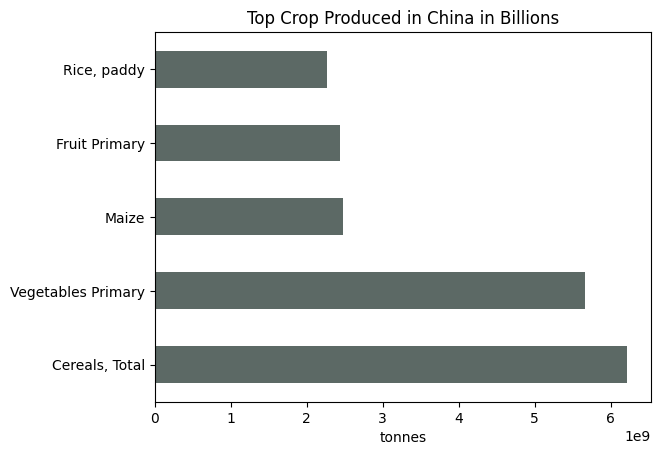

In [27]:
top_10_china.head().plot(kind="barh",color="#5c6965")
plt.title("Top Crop Produced in China in Billions")
plt.xlabel("tonnes")
plt.ylabel("")
plt.legend().remove();

Observation: China's top crop produced is Cereal and Vegetables in comparison to other crops produced such as Maize, Fruit, and Rice

### 7- Vegetable vs Cereal Production

In [28]:
vegetables_china = china[china["item"] == "Vegetables Primary"]
cereal_china = china[china["item"] == "Cereals, Total"]

In [29]:
from bokeh.plotting import figure, show

# prepare some data
x = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
y1 = vegetables_china["quantity"]
y2 = cereal_china["quantity"]

# create a new plot with a title and axis labels
p = figure(title="Vegetables vs Cereal Production", x_axis_label="years", y_axis_label="quantity")

# add multiple renderers
p.line(x, y1, legend_label="Vegetables", color="lightblue", line_width=2)
p.line(x, y2, legend_label="Cereal", color="grey", line_width=2)

# show the results
show(p)

Observation: Cereal vs vegetable production in China 

### 8- Choropleth Map

In [30]:
gdf = pd.read_csv('/Users/ahmedaldossary/Documents/Crop_Project/data/gdf.csv')
gdf.rename(columns={"country":"area"},inplace=True)

In [31]:
df_map = pd.merge(asia_last_10_yrs,gdf,how="left",on="area")
df_map.drop("Unnamed: 0.1",axis=1,inplace=True)
df_map.drop("Unnamed: 0",axis=1,inplace=True)

In [32]:
def fill_china(x):
    if x["area"] == "China, mainland":
        return "CHN"
    else: return x["alpha-3"]
df_map['test'] = df_map.apply(fill_china, axis =1)

In [33]:
df_map1 = pd.DataFrame(df_map.groupby(["area","test","year"]).quantity.sum(),columns=["quantity"]).reset_index().reset_index()
df_map1["quantity"] = df_map1["quantity"].astype("int")

In [34]:
fig_map = px.choropleth(df_map1,
                                locations='test',
                                hover_name='area',
                                color= 'quantity',
                                animation_frame="year",
                                range_color=[0, 3000000000],
                                color_continuous_scale= "tealrose",
                                # color_continuous_scale= px.colors.sequential.Purples,
                                title= "Crop Production in Asia"
                                )
fig_map.update_layout(geo_scope="asia")


Observation: Animated map showcasing the growth of crop production over the past 10 years in Asia. Clearly, China is the pioneer when it comes to crop production.

### 5. Conclusion
- Fruit and Vegetables are the highest produced crops in Bahrain
- The most crop produced in Bahrain is green chilies and peppers
- Bahrain production for dates decreased from 2009 till 2013 then increased from 2014 till 2016 then it continues to reduce due to a decrease in the number of palm trees
- China is the highest productive country in Asia in which Cereals and Vegetables are the highest crops produced
- Most countries produce agricultural products in Asia are China, India, Indonesia, Thailand, Pakistan, Turkey, Philippines, Viet Nam, Bangladesh and Malaysia
- Most crops produce in Asia are Cereals, Vegetables, Sugar Crops, Sugar cane, Rice, Oilcrops, Fruit, Rice milled, Roots and Tubers, and Wheat where Cereals is the highest and wheat is the lowest
- Crops production increase over the years
- In the last 10 years the Cereal production increased
- Over the last 10 years China production for Cereals and Vegetables increasing where the Cereal production is the highest.

### 6. Bonus (Fun Facts About Bahrain)

In [35]:
bahrain = asia_last_10_yrs[asia_last_10_yrs["area"] == "Bahrain"]

In [36]:
bahrain

,area,item,element,unit,year,quantity
463165,Bahrain,Bananas,Production,tonnes,2009,940.0
463168,Bahrain,Cabbages and other brassicas,Production,tonnes,2009,764.0
463171,Bahrain,Carrots and turnips,Production,tonnes,2009,264.0
463174,Bahrain,Cauliflowers and broccoli,Production,tonnes,2009,890.0
463176,Bahrain,Chick peas,Production,tonnes,2009,0.0
...,...,...,...,...,...,...
559619,Bahrain,Fruit Primary,Production,tonnes,2019,22170.0
559622,Bahrain,"Pulses, Total",Production,tonnes,2019,5.0
559625,Bahrain,"Roots and Tubers, Total",Production,tonnes,2019,30.0
559628,Bahrain,"Treenuts, Total",Production,tonnes,2019,351.0


### Top 10 Crops in Bahrain

In [37]:
bahrain_production = pd.DataFrame(bahrain.groupby(by = ["item"]).quantity.sum().sort_values(ascending=False).head(10)).astype("int")
bahrain_production

,quantity
item,
Fruit Primary,236292
Vegetables Primary,174519
Dates,145219
"Fruit, fresh nes",56990
Tomatoes,55428
"Vegetables, fresh nes",30685
Cucumbers and gherkins,16004
"Pumpkins, squash and gourds",15608
Eggplants (aubergines),14195


In [38]:
bahrain[bahrain["item"] == "Watermelons"]

,area,item,element,unit,year,quantity
463233,Bahrain,Watermelons,Production,tonnes,2009,179.0
472871,Bahrain,Watermelons,Production,tonnes,2010,189.0
482509,Bahrain,Watermelons,Production,tonnes,2011,189.0
492147,Bahrain,Watermelons,Production,tonnes,2012,212.0
501785,Bahrain,Watermelons,Production,tonnes,2013,220.0
511423,Bahrain,Watermelons,Production,tonnes,2014,221.0
521061,Bahrain,Watermelons,Production,tonnes,2015,217.0
530699,Bahrain,Watermelons,Production,tonnes,2016,231.0
540337,Bahrain,Watermelons,Production,tonnes,2017,238.0
549975,Bahrain,Watermelons,Production,tonnes,2018,246.0


In [39]:
bahrain_dates = bahrain[bahrain["item"] == "Dates"]
bahrain_dates

,area,item,element,unit,year,quantity
463185,Bahrain,Dates,Production,tonnes,2009,12887.0
472823,Bahrain,Dates,Production,tonnes,2010,12562.0
482461,Bahrain,Dates,Production,tonnes,2011,12216.0
492099,Bahrain,Dates,Production,tonnes,2012,11869.0
501737,Bahrain,Dates,Production,tonnes,2013,11595.0
511375,Bahrain,Dates,Production,tonnes,2014,13473.0
521013,Bahrain,Dates,Production,tonnes,2015,14646.0
530651,Bahrain,Dates,Production,tonnes,2016,17321.0
540289,Bahrain,Dates,Production,tonnes,2017,12750.0
549927,Bahrain,Dates,Production,tonnes,2018,12900.0


### Bahrain Production

In [40]:
bahrain["quantity"] = bahrain.quantity.astype("int64")

/var/folders/yn/r1t3820x6kj1hrnkz_9b21s80000gn/T/ipykernel_32180/2069775110.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
df = bahrain
fig = px.scatter(df, x= "quantity"
                 , y="year", animation_frame="year", animation_group="item",
           size="quantity", color="item", hover_name="area",
           log_x=True, size_max=55, range_x=[100,40000], range_y=[1000,3000],title="Crop Production in Bahrain")

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

Observation: The change in crop production over a span of 10 years in Bahrain.

### Bahrain vs Kuwait Crop Production

In [42]:
kuwait = asia_last_10_yrs[asia_last_10_yrs["area"] == "Kuwait"]
kuwait_production = pd.DataFrame(kuwait.groupby(by = ["item"]).quantity.sum().sort_values(ascending=False).head()).astype("int")
bahrain_production = bahrain_production.head()

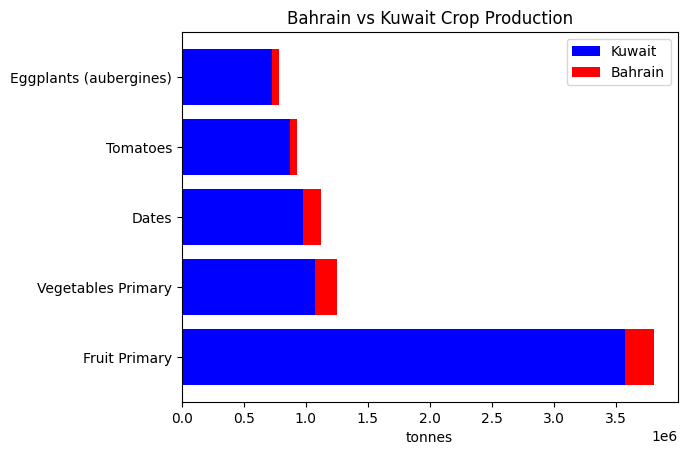

In [43]:
x = ['Fruit Primary','Vegetables Primary','Dates','Tomatoes','Eggplants (aubergines)']
y1 = kuwait_production["quantity"]
y2 = bahrain_production['quantity']
labels = ["Kuwait","Bahrain"]
# plot bars in stack manner
plt.barh(x, y1, color='blue', label = "Kuwait")
plt.barh(x, y2, left=y1, color='red', label = "Bahrain")
plt.legend(labels)
plt.xticks(rotation = 0)
plt.title("Bahrain vs Kuwait Crop Production")
plt.xlabel("tonnes")
plt.show()

Observation: Suprisingly Bahrain surpasses Kuwait in crop production!